1. Download the housing dataset
2. Pick a number of features that you think may be correlated and plot pairs of them to confirm that they are correlated.
3. Pick one feature that you think can be predicted by the other features in the dataset. The feature to be predicted needs to have numerical values.
4. Separate the data into training, validation, and test sets.
5. Apply various Scikit Learn Regression Methods to the data.
6. Quantify how good a job each method did in predicting the value of the dependent variable (using your test data set). Discuss why you believe each method performed as it did.
7. Repeat step 3-6 for a second feature.
8. Upload your notebook to blackboard. Include your discussion.

#### Machine Learning Regression Methods
1. Linear
2. Ridge
3. Kernel
4. Source Vector
5. Lasso
6. Elastic Net

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import kernel_ridge
from sklearn import svm

In [8]:
data = pd.read_csv('housing_data.txt', delim_whitespace=True, header=None)
# Attribute Information from housing_name.txt
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [20]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [15]:
# finding correlation
correlation = data.corr(method='pearson')
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


High Correlation (whether it be negatively or positively correlated)
1. TAX & RAD (91%) - positive correlation
2. NOX & DIS (-77%) - negative correlation
3. INDUS & NOX (76%) - positive correlation

Let us plot each of findings on a scatterplot to see the relationship

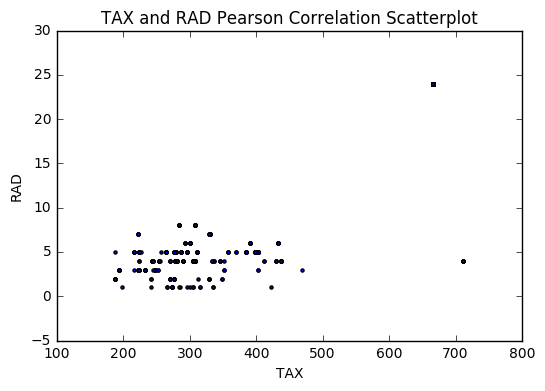

In [100]:
# TAX & RAD (91%) - positive correlation
plt.scatter(data['TAX'], data['RAD'], s=5)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX and RAD Pearson Correlation Scatterplot')
plt.show()

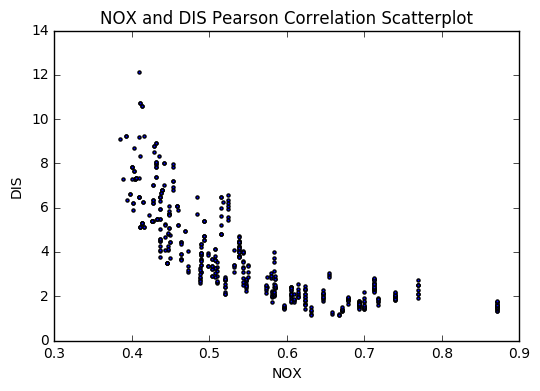

In [101]:
# NOX & DIS (-77%) - negative correlation
plt.scatter(data['NOX'], data['DIS'], s=5)
plt.xlabel('NOX')
plt.ylabel('DIS')
plt.title('NOX and DIS Pearson Correlation Scatterplot')
plt.show()

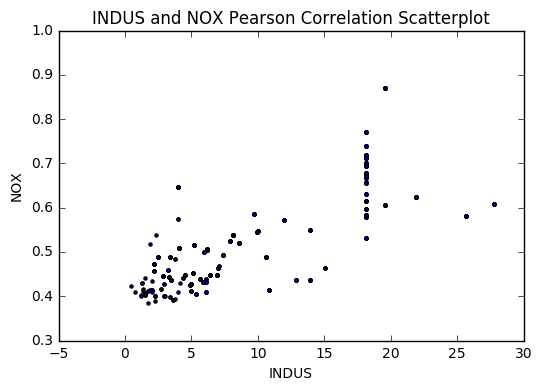

In [102]:
# INDUS & NOX (76%) - positive correlation
plt.scatter(data['INDUS'], data['NOX'], s=5)
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('INDUS and NOX Pearson Correlation Scatterplot')
plt.show()

Pick one feature that you think can be predicted by the other features in the dataset. The feature to be predicted needs to have numerical values.

Features we can try to predict 
1. TAX
2. RAD 
3. NOX 
4. DIS 
5. INDUS

In [53]:
def train_test_validation(feature):
    global data
    X = data.loc[:, data.columns != feature]
    y = data[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    return X_train, X_test, X_val, y_train, y_test, y_val

In [69]:
def score_linearRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    linearRegression = linear_model.LinearRegression();
    linearRegression.fit(X_train, y_train)
    return [linearRegression.score(X_val, y_val), linearRegression.score(X_test, y_test)]

def score_ridgeRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    ridgeRegression = linear_model.Ridge(alpha=1)
    ridgeRegression.fit(X_train, y_train)
    return [ridgeRegression.score(X_val, y_val), ridgeRegression.score(X_test, y_test)]

def score_kernelRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    kernelRegression = kernel_ridge.KernelRidge(alpha=1)
    kernelRegression.fit(X_train, y_train)
    return [kernelRegression.score(X_val, y_val), kernelRegression.score(X_test, y_test)]
    
def score_svRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    svRegression = svm.SVR()
    svRegression.fit(X_train, y_train)
    return [svRegression.score(X_val, y_val), svRegression.score(X_test, y_test)]
    
def score_lassoRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    lassoRegression = linear_model.Lasso(alpha=1)
    lassoRegression.fit(X_train, y_train)
    return [lassoRegression.score(X_val, y_val), lassoRegression.score(X_test, y_test)]

def score_elasticRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    elasticRegression = linear_model.ElasticNet(alpha=1)
    elasticRegression.fit(X_train, y_train)
    return [elasticRegression.score(X_val, y_val), elasticRegression.score(X_test, y_test)]

In [70]:
def score_allRegression(X_train, X_test, X_val, y_train, y_test, y_val):
    return [
        score_linearRegression(X_train, X_test, X_val, y_train, y_test, y_val),
        score_ridgeRegression(X_train, X_test, X_val, y_train, y_test, y_val),
        score_kernelRegression(X_train, X_test, X_val, y_train, y_test, y_val),
        score_svRegression(X_train, X_test, X_val, y_train, y_test, y_val),
        score_lassoRegression(X_train, X_test, X_val, y_train, y_test, y_val),
        score_elasticRegression(X_train, X_test, X_val, y_train, y_test, y_val)]

In [71]:
def result_feature(feature):
    X_train, X_test, X_val, y_train, y_test, y_val = train_test_validation(feature)
    return score_allRegression(X_train, X_test, X_val, y_train, y_test, y_val)

#### Machine Learning Regression Methods we are testing

1. Linear
2. Ridge
3. Kernel
4. Source Vector
5. Lasso
6. Elastic Net

In [88]:
#result_FEATURE shape [validation, testing]

# TAX feature
result_TAX = result_feature('TAX')

# RAD feature
result_RAD = result_feature('RAD')

# NOX feature
result_NOX = result_feature('NOX')

# DIS feature
result_DIS = result_feature('DIS')

# INDUS feature
result_INDUS = result_feature('INDUS')

In [89]:
def create_final_table(which_feature_result, feature):
    global table_header, regression_model
    final_table = []
    regression_iterator = 0
    for i in which_feature_result:
        final_table.append([regression_model[regression_iterator%6], feature, i[0], i[1]])
        regression_iterator += 1
    print(tabulate(final_table, headers=table_header))

## Result

In [103]:
from tabulate import tabulate

regression_model = ['Linear', 
                    'Ridge', 
                    'Kernel', 
                    'Source Vector', 
                    'Lasso', 
                    'Elastic']

table_header = ["Regression Model", "Feature", "Validation Score", "Testing Score"]

create_final_table(result_TAX, 'TAX')
print('\n \n ')

create_final_table(result_RAD, 'RAD')
print('\n \n ')

create_final_table(result_NOX, 'NOX')
print('\n \n ')

create_final_table(result_DIS, 'DIS')
print('\n \n ')

create_final_table(result_INDUS, 'INDUS')

Regression Model    Feature      Validation Score    Testing Score
------------------  ---------  ------------------  ---------------
Linear              TAX                  0.85642          0.842081
Ridge               TAX                  0.858625         0.843197
Kernel              TAX                  0.852966         0.836579
Source Vector       TAX                 -0.14316         -0.364249
Lasso               TAX                  0.859609         0.844156
Elastic             TAX                  0.859155         0.84521

 
 
Regression Model    Feature      Validation Score    Testing Score
------------------  ---------  ------------------  ---------------
Linear              RAD                  0.842045         0.821324
Ridge               RAD                  0.836743         0.818494
Kernel              RAD                  0.81375          0.795717
Source Vector       RAD                 -0.147037        -0.254556
Lasso               RAD                  0.813492         

## Conclusion
#### Discuss why you believe each method performed as it did.

In this assignment, from a given housing data file from the UCI website, I converted the textfiles into readable dataframe with the respective column names given from housing_name.txt. There are 13 attributes. I used Pearson's Correlation Matrix to compute the correlation between each two of the given 13 attributes. 

From my finding, I found three great correlations (positive or negative). They are (TAX,RAD) (NOX,DIS) (INDUS,NOX). What I found interesting from these five unique features were that they all seem to have high correlations with other features thirteen.

Therefore, I chose TAX, RAD, NOX, DIS, INDUS features to see if regression models I learned in class can predict these variables.

The regression models employed in this assignment are:
1. Linear
2. Ridge
3. Kernel
4. Source Vector
5. Lasso
6. Elastic

After creating functions that compute split the data into test, train, and validation groups, the results were surprising.
Linear Regression was the best performing regression model. 
Source Vector Regression was the worst performing regression model.

My assumption for this result would be that there is no multicollinearity (ex. (TAX, RAD) = 91% but the next greatest correlation is (NOX,DIS) = -77%).
I learned that linear regression performs well when it does not have multicollinearity in the training dataset. 